In [1]:
# add modules folder to Python's search path
import sys
from pathlib import Path
from os.path import dirname, abspath
script_dir = Path(dirname(abspath('')))
module_dir = str(script_dir)
print(module_dir)
sys.path.insert(0, module_dir + '/modules')
sys.path.insert(0, module_dir + '/models')

#import rest of the modules
import tensorflow as tf
import numpy as np
import geomap as gm
import Lorenz63_xz as lorenz

C:\Users\pinak\Documents\GitHub\geomap


In [16]:
# load data
dim = 40
num_paths = 50 
length = 100
total_length = num_paths * length
data_prefix = 'Lorenz96_40_{}_{}'.format(num_paths, length)
train_size = int(total_length * 0.7)
test_size = total_length - train_size
data_folder = '../data'
x_train = np.load('{}/{}_x.npy'.format(data_folder, data_prefix))[:train_size, :]
x_test = np.load('{}/{}_x.npy'.format(data_folder, data_prefix))[:test_size]
y_train = np.load('{}/{}_y.npy'.format(data_folder, data_prefix))[:train_size]
y_test = np.load('{}/{}_y.npy'.format(data_folder, data_prefix))[:test_size]
print(x_train.shape, y_test.shape)

(3500, 40) (1500, 40)


In [ ]:
# build a network and train or load pre-trained model
nn = gm.GeoMap(dim=dim, num_layers=3, num_nodes=50, folder=data_folder, name='fc_l96_{}'.format(dim))
epochs = 10000
nn.load(model_id=epochs)
nn.learn(x_train, y_train, epochs=epochs, learning_rate=1e-4)
nn.save(model_id=epochs)

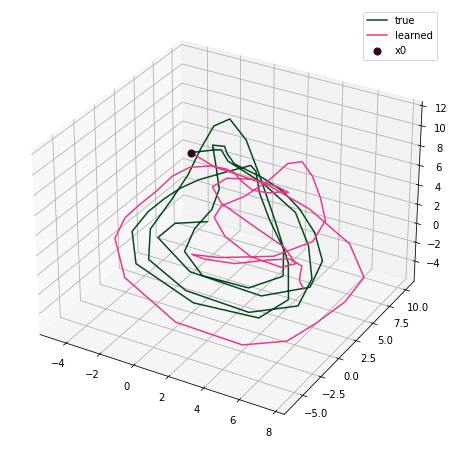

In [18]:
# visualize learned map
test_path = x_train[0:60]
nn.visualize(path=test_path, plot_type='3d', coords=[0, 1, 2])

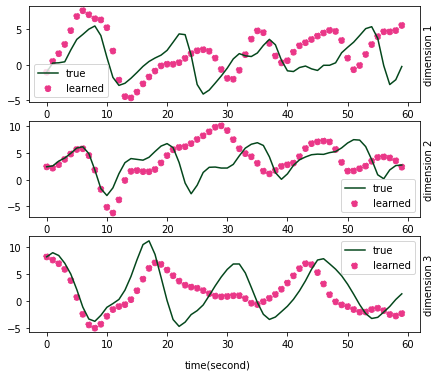

In [19]:
nn.visualize(path=test_path, plot_type='1d', coords=[0, 1, 2])

In [6]:
_, gen_path = lorenz.get_model(x0=np.random.uniform(size=dim), size=10, obs_gap=0.1)
sc = gm.SpeedCompare(gen_path, nn.gen_path)
sc.test(100, np.random.normal(size=3), 50)

ValueError: could not broadcast input array from shape (3) into shape (100)